# Estadística descriptiva

## ¿Qué vamos a ver hoy?

### Estadística descriptiva

Son herramientas que sirven para describir un conjunto de valores mediante algunas características del conjunto.

Vamos a ver que es y como calcular:

Maneras de buscar un valor representativo

- Media
- Mediana
- Moda

Maneras de cuantificar cuanto varian los valores

- Rango
- Varianza
- Desviacion estandar
- Coeficiente de variacion

Maneras de ver si diferentes aspectos o variables se vinculan entre si.

- Covarianza
- Correlacion

No vamos a ver hoy estaditica inferencial, es decir tratar de predecir que puede pasar o que probabilidad hay que de que sucedan cosas a partir de los datos conocidos.

### Herramientas basicas de visualización

No es el objetivo de la clase de hoy (hay mas de una clase que vamos a dedicar exclusivamente a eso), pero para ayudarnos a visualizar la infomacion vamos a ver como generar:

- Graficos de lineas
- Graficos de puntos
- Histogramas

## Idea de la clase

- Arranacamos con una pequeña encuesta que vamos a usar de ejemplo durante la clase.
- Vamos repasando con la presentacion las ideas y vamos probando implementar las ideas en los datos de la encuesta.
- Despues del ejemplo en conjunto queda el hands-on para que practiquen en clase (esperemos llegar).

# La encuesta....

https://forms.gle/JgpooKWc2L9vg5pn9

In [1]:
import numpy as np

In [28]:
filename = "Formulario C4.csv"
data_cruda = np.genfromtxt(filename, delimiter=",", dtype=str) # Notar que si no ponemos el separador correcto tira error. Y si no ponemos dtype lee todo como vacio.
data_cruda

alturas = data_cruda[1:,1].astype(float) # Seleccionamos la columna 1 desde la fila uno hasta el final
print (alturas)

pesos = data_cruda[1:,2].astype(float) # Seleccionamos la columna 1 desde la fila uno hasta el final
print (pesos)



[172. 190. 178. 177. 156. 183. 168. 181. 185. 178. 160. 174. 174. 183.
 170. 163. 168. 173. 176. 175. 160. 164. 174. 168. 170. 168. 163. 165.
 158. 150. 171. 178. 162.]
[ 65.  83. 132.  80.  75.  73.  68.  71.  80.  76.  62.  71.  93.  98.
  80.  67.  60.  64.  86.  67.  57.  75.  76.  68.  77.  69.  70.  55.
  47.  51.  75.  76.  50.]


In [29]:
# Calculamos la media, la mediana y la moda para las columnas

print (f'El valor medio para las alturas del curso es: {np.mean(alturas)}')
print (f'El valor medio para los pesos del curso es: {np.mean(pesos)}')

print (f'La mediana para las alturas del curso es: {np.median(alturas)}')
print (f'La mediana para los pesos del curso es: {np.median(pesos)}')


# numpy no tiene un metodo para calcular la moda!!!!!

# Pero otra libreria como scipy si

from scipy import stats # No funciona import scipy y usar scipy.stats

print (f'La moda para las alturas del curso es: {stats.mode(alturas)}') # Vemos que no tiene mucho sentido!


El valor medio para las alturas del curso es: 170.75757575757575
El valor medio para los pesos del curso es: 72.63636363636364
La mediana para las alturas del curso es: 171.0
La mediana para los pesos del curso es: 71.0
La moda para las alturas del curso es: ModeResult(mode=array([168.]), count=array([4]))


In [10]:
import seaborn as sns

<AxesSubplot:>

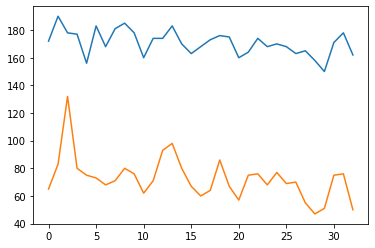

In [30]:
# Hacer un grafico tipo "comun"

sns.lineplot(data = alturas)
sns.lineplot(data = pesos)

<AxesSubplot:>

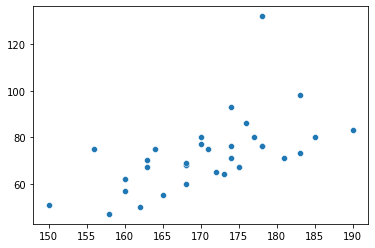

In [31]:
sns.scatterplot(x = alturas, y = pesos)


<AxesSubplot:ylabel='Count'>

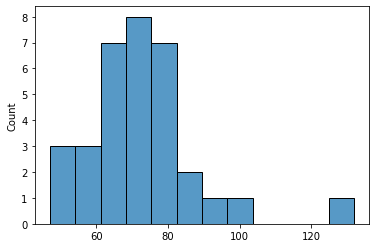

In [32]:
sns.histplot(pesos)

<AxesSubplot:ylabel='Count'>

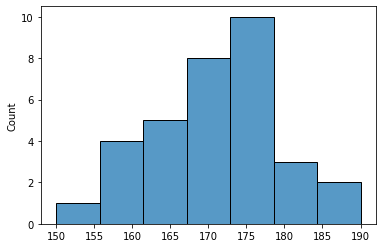

In [33]:
sns.histplot(alturas)

In [34]:
print (f'El rango de alturas va de: {np.max(alturas)}cm a {np.min(alturas)}cm, es decir que la alturas cubren un rango de {np.max(alturas)-np.min(alturas)}cm.' )

# Ahora queremos saber donde esta el 50% de las alturas mas comunes
# Numpy tiene una funcion que separa en partes ordenando

print (np.percentile(alturas, [75,25]))


print (f'El 50% de las alturas mas comunes estan entre: {np.percentile(alturas, [75 ,25])[1]}cm y {np.percentile(alturas, [75 ,25])[0]}cm.')



El rango de alturas va de: 190.0cm a 150.0cm, es decir que la alturas cubren un rango de 40.0cm.
[177. 164.]
El 50% de las alturas mas comunes estan entre: 164.0cm y 177.0cm.


In [36]:
# Como pedirle a numpy que nos calcule la varianza

print (f'La viarianza en las alturas es de: {np.var(alturas)}cm^2')
print (f'La desviacion estandar es de: {np.std(alturas)}cm')

La viarianza en las alturas es de: 79.03213957759414cm^2
La desviacion estandar es de: 8.890002225961146cm


In [41]:
# Vamos a calcular que porcentaje de los valores caen dentro de una desviacion estandar de la media

n = 2
sd = np.std(alturas)
mean = np.mean(alturas)

mascara = (mean - n * sd < alturas) & (alturas < mean + n * sd)
#print (alturas[mascara])
print (mascara.sum())
print (f'El porcenaje de valores que caen dentro del rango indicado es: {mascara.sum()/len(mascara)*100}%')


31
El porcenaje de valores que caen dentro del rango indicado es: 93.93939393939394%


In [47]:
# Comparando variabilidades entre dos variables

print (f'La desviacion estandar de las alturas es {np.std(alturas)}cm, y su valor medio es {np.mean(alturas)}cm. Su ceoficiente de variación es {coef_var(alturas)}')
print (f'La desviacion estandar de los pesos es {np.std(pesos)}Kg, y su valor medio es {np.mean(pesos)}Kg. Su ceoficiente de variación es {np.std(pesos)/np.mean(pesos)}')

La desviacion estandar de las alturas es 8.890002225961146cm, y su valor medio es 170.75757575757575cm. Su ceoficiente de variación es 0.05206212483703954
La desviacion estandar de los pesos es 15.405269035287466Kg, y su valor medio es 72.63636363636364Kg. Su ceoficiente de variación es 0.21208755868355708


In [50]:
# Repasemos los graficos pero ahora vamos a agregar las columnas genero y nombre

sexo = data_cruda[1:,3]
sexo[sexo=="Varon"] = "-3"
sexo[sexo=="Mujer"] = "3"
sexo = sexo.astype(float)
print (sexo)

letras = data_cruda[1:,4].astype(float) # Seleccionamos la columna 1 desde la fila uno hasta el final
print (letras)


[-3. -3. -3. -3.  3. -3. -3. -3. -3. -3.  3. -3. -3. -3. -3.  3.  3.  3.
 -3. -3.  3.  3. -3. -3. -3. -3. -3.  3.  3.  3. -3. -3.  3.]
[ 5.  5.  6.  8.  5.  8.  6.  7.  8.  8.  8.  7.  6.  6.  5.  8.  7.  6.
  7.  7.  3.  7. 13.  7.  5.  8.  8.  7.  7.  6.  5.  8.  6.]


In [46]:
def coef_var(data):
    return np.std(data)/np.mean(data)

### Comparamos alturas con pesos

<AxesSubplot:>

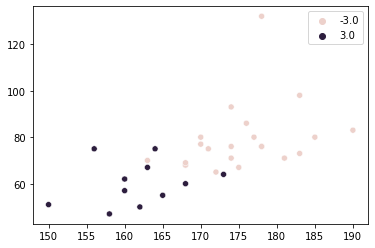

In [55]:
sns.scatterplot(x = alturas, y = pesos, hue=sexo)

In [58]:
# Armamos la matriz con todos los datos

datos = [alturas,pesos,sexo,letras]
print ("Matriz con los datos")
print (datos)

#print (np.var(datos[0]))
datos2 = np.transpose(datos)
print (np.cov(datos,ddof=0))
print (np.corrcoef(datos))

Matriz con los datos
[array([172., 190., 178., 177., 156., 183., 168., 181., 185., 178., 160.,
       174., 174., 183., 170., 163., 168., 173., 176., 175., 160., 164.,
       174., 168., 170., 168., 163., 165., 158., 150., 171., 178., 162.]), array([ 65.,  83., 132.,  80.,  75.,  73.,  68.,  71.,  80.,  76.,  62.,
        71.,  93.,  98.,  80.,  67.,  60.,  64.,  86.,  67.,  57.,  75.,
        76.,  68.,  77.,  69.,  70.,  55.,  47.,  51.,  75.,  76.,  50.]), array([-3., -3., -3., -3.,  3., -3., -3., -3., -3., -3.,  3., -3., -3.,
       -3., -3.,  3.,  3.,  3., -3., -3.,  3.,  3., -3., -3., -3., -3.,
       -3.,  3.,  3.,  3., -3., -3.,  3.]), array([ 5.,  5.,  6.,  8.,  5.,  8.,  6.,  7.,  8.,  8.,  8.,  7.,  6.,
        6.,  5.,  8.,  7.,  6.,  7.,  7.,  3.,  7., 13.,  7.,  5.,  8.,
        8.,  7.,  7.,  6.,  5.,  8.,  6.])]
[[ 7.90321396e+01  8.03057851e+01 -1.80606061e+01  2.39577594e+00]
 [ 8.03057851e+01  2.37322314e+02 -2.47272727e+01 -1.18457300e-01]
 [-1.80606061e+01 -2.47272